!pip install scikit-network seaborn  --quiet

# Model Evaluation

In [20]:
from scipy.io import loadmat
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from collection import *
from global_variables import * 

### Select K 
``` matlab
value = getGammaSimilarity(gamma{i}, gamma{j})

simi_matrix(i,j)=value; simi_matrix(j,i)=value
```

In [3]:
mean_simi_df = mean_simi_mat(range(1, K_max), base)


Text(0, 0.5, 'Mean Similarity')

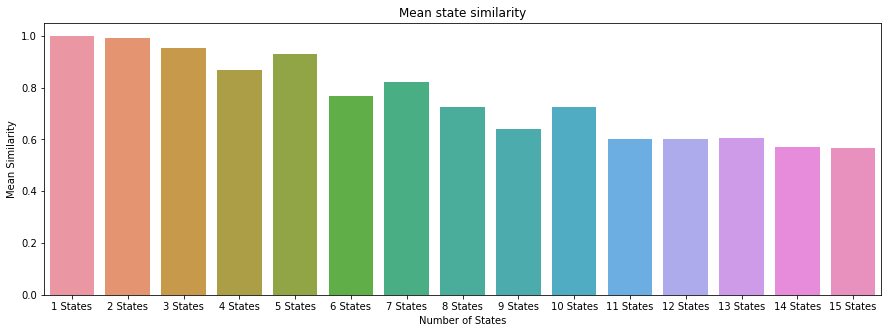

In [4]:
plt.figure(figsize=(15,5))
plt.title("Mean state similarity")
sns.barplot(x='State', y='Mean_simi', data=mean_simi_df)
plt.xlabel('Number of States')
plt.ylabel('Mean Similarity')

In [59]:
K_state = 6 # select K

## Select Reptition

In [60]:
state_simimat=load_simimat(K_state, base)

<AxesSubplot:>

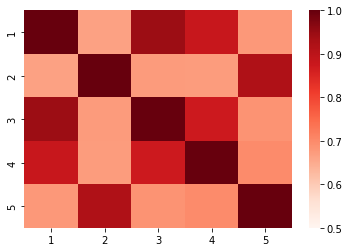

In [61]:
sns.heatmap(pd.DataFrame(state_simimat, index=range(1,6), columns=range(1,6)), cmap='Reds', vmin=0.5)

Text(0.5, 1.0, 'Mean Similarity for Each Reptition')

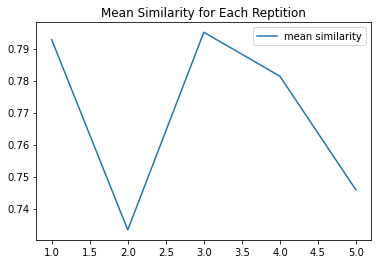

In [62]:
pd.DataFrame((state_simimat.sum(axis=1)-1)/4, index=range(1,6), columns=['mean similarity']).plot()
plt.title("Mean Similarity for Each Reptition")

In [63]:

maxfo_array = np.array([]); switch_array = maxfo_array.copy()
rep_index= np.repeat([i for i in range(1, total_reps+1)],sub_num)

for r in range(total_reps):
    hmminfo_file = base+f'hmminfo/hmminfo_k{K_state}_rep_{r+1}.mat'
    info_array=loadmat(hmminfo_file)[hmminfo_source]
    sr, mf = parse_chronnectome(info_array, model_selection=True)
    switch_array = np.concatenate((switch_array, sr))
    maxfo_array = np.concatenate((maxfo_array, mf))
    
switching_rate_df = pd.DataFrame(np.array([rep_index, switch_array]).T, columns=['rep_num', 'Switching Rates']) 
maxfo_df = pd.DataFrame(np.array([rep_index, maxfo_array]).T, columns=['rep_num', 'Max FO']) 

<AxesSubplot:xlabel='rep_num', ylabel='Switching Rates'>

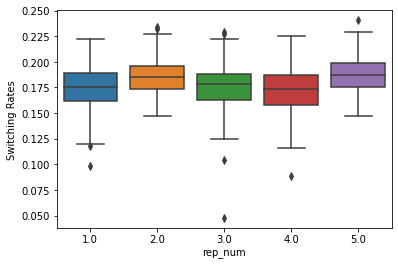

In [64]:
sns.boxplot(x='rep_num', y='Switching Rates', data=switching_rate_df)


<AxesSubplot:xlabel='rep_num', ylabel='Max FO'>

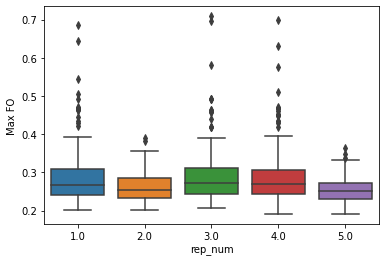

In [65]:
sns.boxplot(x='rep_num', y='Max FO', data=maxfo_df)

In [66]:
rep_num = 1
hmm_file = base+f'chronotype_k{K_state}_rep_{rep_num}.mat'
hmminfo_file = base+f'hmminfo/hmminfo_k{K_state}_rep_{rep_num}.mat'
hmminfo_file

'/home/jzni/dissertation/analysis/output/hmminfo/hmminfo_k6_rep_1.mat'

# Further Analysis

In [67]:
hmm = loadmat(hmm_file)
hmm_info = loadmat(hmminfo_file)


In [68]:
# Parse HMM info
fo_corr = hmm_info['fo_matrix']
ordered_p = hmm_info['ordered_p']
state_order = hmm_info['ord'] # the order of state for fo_corr and ordered_p
## hmms = hmm_info['hmms']  # contains the subject specific hmm
# Parse chronnectome info
## info based on veterbi path 
raw_fo, lifetime, intervals = parse_chronnectome(hmm_info[hmminfo_source], model_selection=False)


<AxesSubplot:>

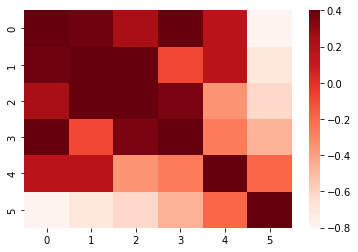

In [69]:
sns.heatmap(fo_corr, cmap="Reds", vmax=0.4)

<AxesSubplot:>

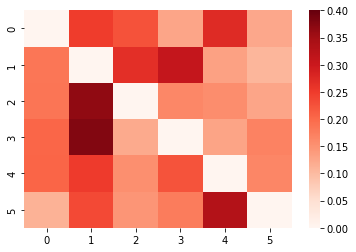

In [70]:
sns.heatmap(ordered_p, cmap="Reds", vmax=0.4)

In [71]:
from IPython.display import SVG
import numpy as np
import networkx as nx
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.clustering import Louvain, modularity, bimodularity
from sknetwork.linalg import normalize
from sknetwork.utils import bipartite2undirected, membership_matrix
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph

In [72]:
G = nx.DiGraph()  # or DiGraph, MultiGraph, MultiDiGraph, etc
for node in range(ordered_p.shape[0]):
    for other_node in range(ordered_p.shape[0]):
        if node == other_node:
            continue
        G.add_weighted_edges_from([(node, other_node, ordered_p[node,other_node])])

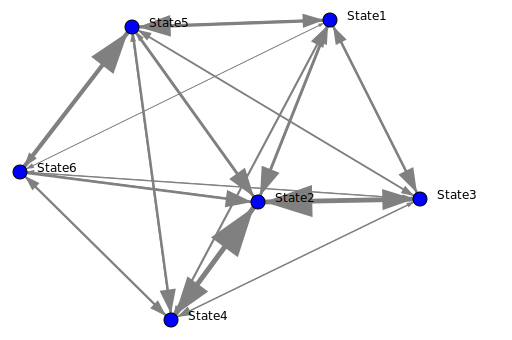

In [73]:
A= nx.to_scipy_sparse_matrix(G)
louvain = Louvain()
labels = louvain.fit_transform(A)
names = [f"State{i+1}" for i in range(K_state) ]
image = svg_digraph(A,names=names, labels=labels)
SVG(image)

In [74]:
louvain.membership_

<6x1 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

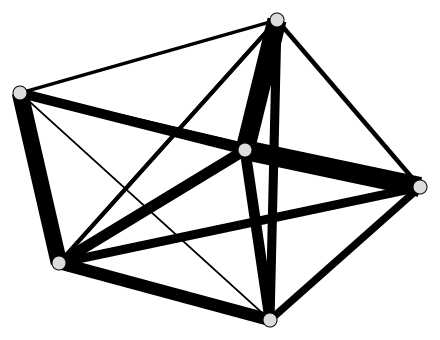

In [75]:
scores = louvain.membership_.toarray().ravel()
image = svg_graph(A, scores=scores)
SVG(image)

In [76]:
cmap = {
    0 : 'maroon',
    1 : 'teal',
    2 : 'black', 
    3 : 'orange',
    4 : 'green',
}

node_cmap = [cmap[v] for _,v in G.items()]

pos = nx.spring_layout(G)
nx.draw(G, pos, node_size = 75, alpha = 0.8, node_color=node_cmap)
plt.show(G)

AttributeError: 'DiGraph' object has no attribute 'items'

In [ ]:
import random
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
graph = painters(metadata=True)
adjacency = graph.adjacency
names = graph.names
position = graph.position
# clustering
louvain = Louvain()
labels = louvain.fit_transform(adjacency)
labels_unique, counts = np.unique(labels, return_counts=True)
print(labels_unique, counts)
[0 1 2] [5 5 4]
image = svg_digraph(adjacency, position, names=names, labels=labels)
SVG(image)


In [ ]:
A

In [ ]:
labels